<h1 style='text-align:center'>
    Gráficos con Python
</h1>

En un primer acercamiento hacer gráficos con Python no es fácil.

Especialmente cuando quieres crear gráficos personalizados y que destaquen en el basto oceano de internet.  

Solo cambiar el fondo de un gráfico o el tamaño de la letra de los ejes puede llegar a resultar un dolor de cabeza.

Esto ocurre porque no hay una buena documentación al respecto. 

Es verdad que matplotlib, seaborn, plotly y las demás tienen una documentación muy extensa, el problema es que esta documentación esta enfocado en gráficos genericos y aburridos. Si quieres ir al siguiente nivel las cosas no son muy intuitivas y tienes que realizar la súper investigación para cosas pequeñas.

Vamos a intentar simplificar esto y a quitarnos dolores de cabeza futuros (en especial a mi),

Empezemos con matplotlib. Siente que esta es la libreria por defecto para gráficar con Python.

Procedemos con una importación sencilla que nos trae todo lo que necesitamos. Tambien vamos a importar pandas porque pandas me hace sentir seguro y porque lo vamos a necesitar para leer los datos que usemos para nuestra gráficos. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Bien, para empezar con matplotlib es importante entender la manera en que los gráficos van a pintarse.

Esta imagen de matplotlib es espectacular para entender las partes de una gráfica.

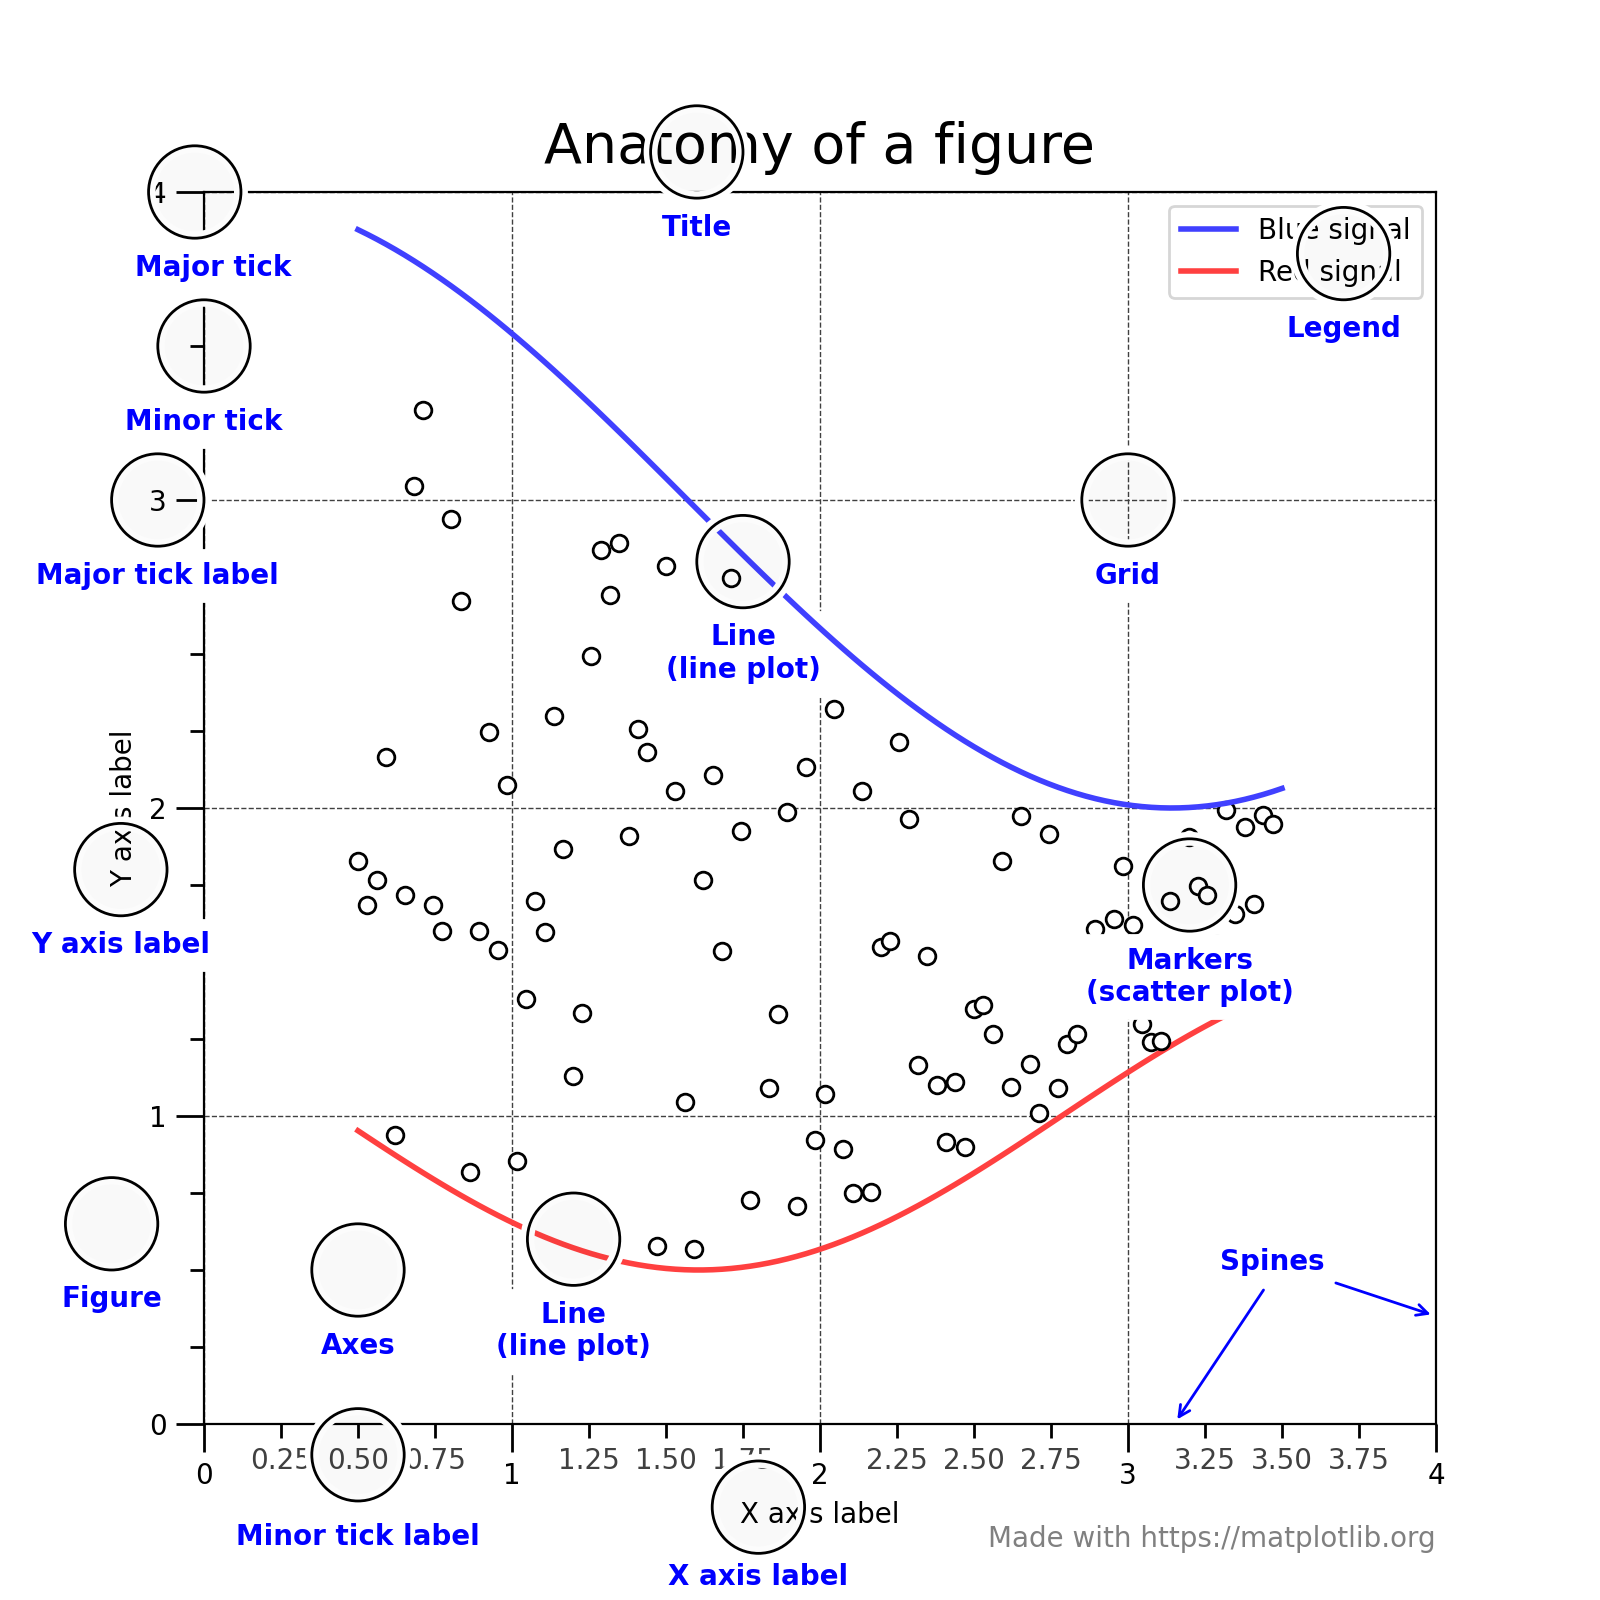

Todos los gráficos de matplotlip tienen dos componentes básicos, la figura y el(o los) eje(s). Estos componentes los definimos cuando inicializamos nuestro código.

Por defecto vamos a tener un solo eje, es decir, una sola cuadricula en la que se pintaran nuestras figuras.

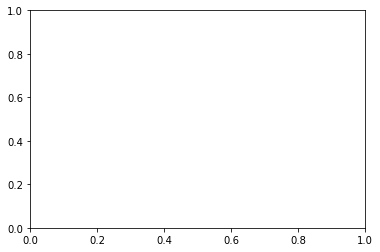

In [3]:
fig, ax = plt.subplots()

Pero podemos cambiar eso dependiendo de la cantidad de figura que queramos pintar en el mismo gráfico. 

Los ejes se ajustan como filas y columnas

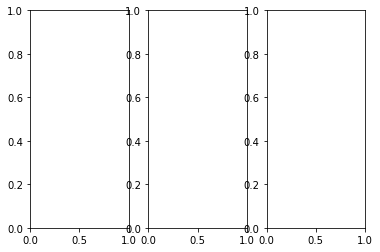

In [4]:
fig, ax = plt.subplots(1,3)

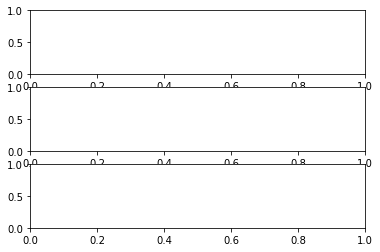

In [5]:
fig, ax = plt.subplots(3,1)

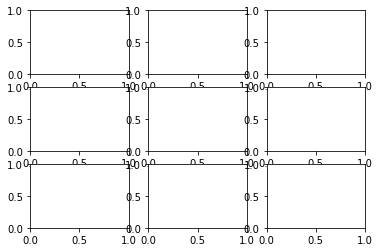

In [32]:
fig, ax = plt.subplots(3,3)

De igual forma, podemos ajustar el tamaño de nuestro gráfico en esta misma linea de código agregando el parametro figsize a la función, los valores que toman se leen como ancho x altura

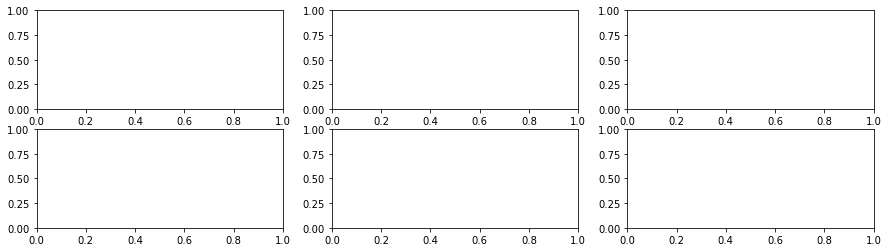

In [6]:
fig, ax = plt.subplots(2, 3, figsize = (15,4))

Podemos agregar más elementos a nuestra cuadricula dependiendo de nuestras necesidades. Aquí van algunos elementos básicos

**Titulo del gráfico**

Text(0.5, 0.98, 'Aquí ponemos el titulo de nuestro grafico')

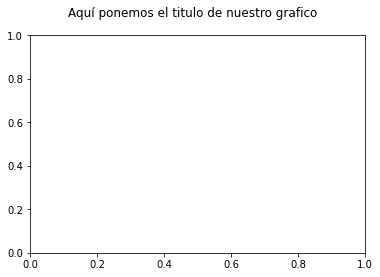

In [9]:
fig, ax = plt.subplots()
fig.suptitle('Aquí ponemos el titulo de nuestro grafico')

**Titulo del eje**

Text(0.5, 1.0, 'Figura 2')

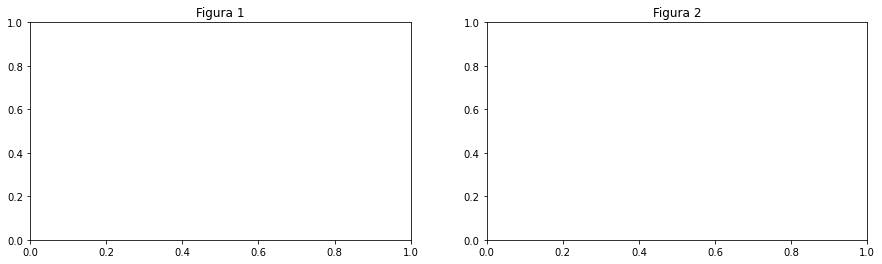

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))
ax[0].set_title('Figura 1')
ax[1].set_title('Figura 2')

Nuestro eje es un array de numpy, por lo que si queremos interactuar con algún elemento en concreto podemos utilizar la notación de arreglos de numpy sin ningún problema.

In [27]:
type(ax)

numpy.ndarray

Text(0.5, 1.0, 'Figura 4')

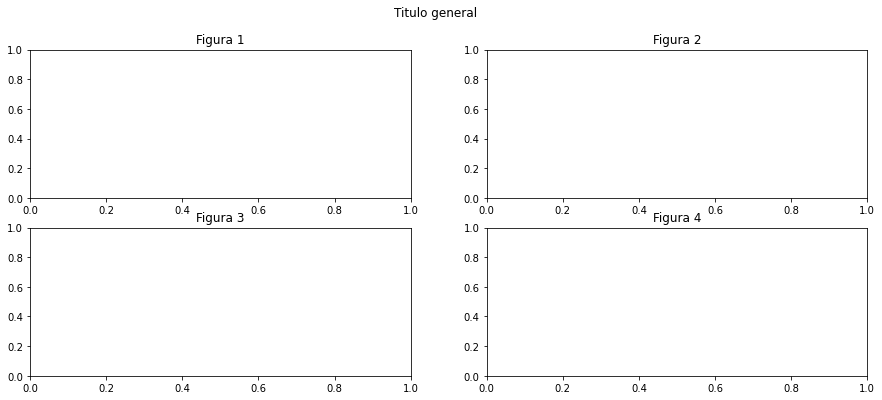

In [34]:
fig, ax = plt.subplots(2, 2, figsize = (15,6))

fig.suptitle('Titulo general')

ax[0,0].set_title('Figura 1')
ax[0,1].set_title('Figura 2')
ax[1,0].set_title('Figura 3')
ax[1,1].set_title('Figura 4')

Okey, ya entendemos lo básico de los titulos, ahora empecemos a modificar los estilos.

Para cambiar los estilos del titulo agregamos parametros en el metodo "suptitle". Los parametros ha y va nos sirven para determinar la ubicación horizontal y vertical respectivamente, de nuestro titulo.

Valores que pueden tomar los parametros:

**fontsize:** Cualquier número o alguno de los siguientes: 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'

**color:** La notación de un color en cualquier formato

**weight:** Un valor númerico entre 0 y 1000 o alguno de los siguientes: 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'

**ha:** 'center', 'left', 'right'

**va:** 'top', 'center', 'bottom', 'baseline'

Text(0.5, 0.98, 'Titulo')

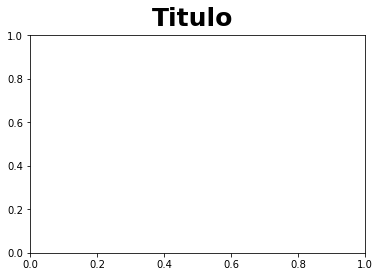

In [75]:
fg, ax = plt.subplots()
plt.suptitle('Titulo', fontsize=25, color='#000', weight='1000', ha='center', va='top')

El metodo **patch.set_facecolor** define el color del fondo de todo nuestro gráfico.

Mientras que **set_facecolor** define el color del fondo de cada eje.En el caso de tener varios ejes se utilizara la notación de arreglos de numpy.

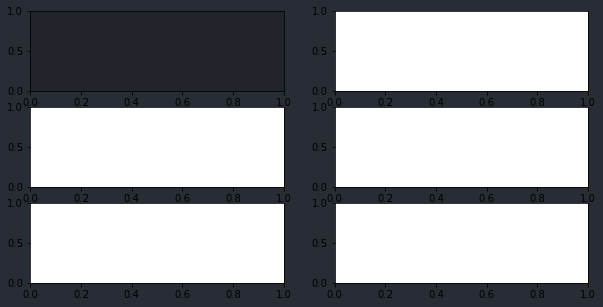

In [100]:
fig, ax = plt.subplots(3,2, figsize=(10, 5))
fig.patch.set_facecolor('#282c34') 
ax[0,0].set_facecolor('#21252b') 

Para ajustar el estilo de nuestras etiquetas "x" y "y" utilizamos los respectivos metodos "xticks" y "yticks"

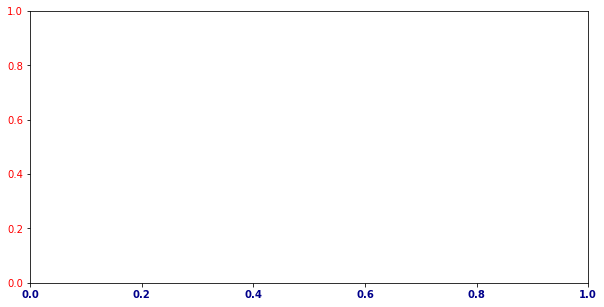

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.xticks(fontsize=10, color='darkblue', weight=1000)
plt.yticks(fontsize=10, color='red', weight=500)
plt.show()

Con esto ya conocemos lo básico sobre la figura y los ejes de nuestro gráfico. Ahora vamos con la figura que queremos poner dentro de nuestro eje.

Empecemos con la trinidad clásica, un diagrama de lineas, uno de barras y uno de pastel

#### **Ejercicios**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I. La tabla 1.3 proporciona datos sobre el índice de precios al consumidor de siete países industrializados, cuya base es 1982-1984  100.

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/JuanFeA98/8f125824ba6388d912754fe89ac0fb67/raw/61a729293587ebc7f07495afa26b5e0ddabc3710/IPC_1980-2005.csv', sep=';')
df.rename(columns = {'Gran Bretaña': 'Gran_Bretaña'}, inplace=True)

In [4]:
paises = list(df.iloc[:, 1:])
paises

['EEUU', 'Canadá', 'Japón', 'Francia', 'Alemania', 'Italia', 'Gran_Bretaña']

a) A partir de estos datos, calcule la tasa de inflación en cada país.<br>

In [5]:
def calc_inf(pais):
    try:
        df[f'Inf_{pais}'] = round(((df[f'{pais}'].diff())/(df[f'{pais}'].shift()))* 100, 2)    
    except:
        print('No tenemos información de ese país')

In [6]:
for i in paises:
    calc_inf(i)

In [7]:
df.head()

,Año,EEUU,Canadá,Japón,Francia,Alemania,Italia,Gran_Bretaña,Inf_EEUU,Inf_Canadá,Inf_Japón,Inf_Francia,Inf_Alemania,Inf_Italia,Inf_Gran_Bretaña
0,1980,82.4,76.1,91.0,72.2,86.7,63.9,78.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,90.9,85.6,95.3,81.8,92.2,75.5,87.9,10.32,12.48,4.73,13.30,6.34,18.15,11.97
2,1982,96.5,94.9,98.1,91.7,97.0,87.8,95.4,6.16,10.86,2.94,12.10,5.21,16.29,8.53
3,1983,99.6,100.4,99.8,100.3,100.3,100.8,99.8,3.21,5.80,1.73,9.38,3.40,14.81,4.61
4,1984,103.9,104.7,102.1,108.0,102.7,111.4,104.8,4.32,4.28,2.30,7.68,2.39,10.52,5.01


b) Grafique la tasa de inflación de cada nación en función del tiempo (es decir, asigne el eje
horizontal al tiempo, y el vertical, a la tasa de inflación).

In [ ]:
!pip uninstall mplcursors

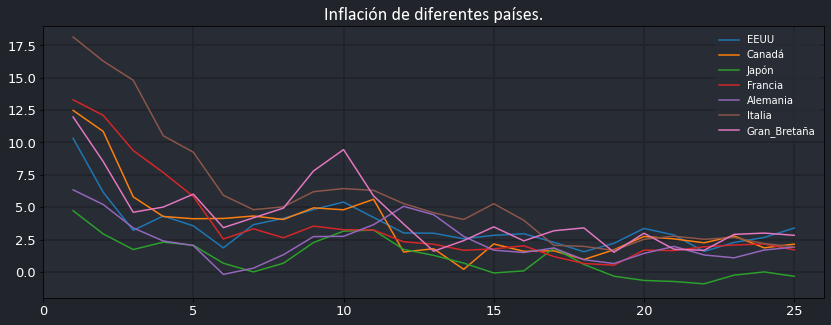

In [9]:
fig, ax= plt.subplots(figsize=(14,5))
csfont = {'fontname':'Calibri'}

plt.title('Inflación de diferentes países.', weight=400, size='18',**csfont, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

for i in paises:
    plt.plot(df.index, df[f'Inf_{i}'], label = f'{i}')

plt.grid(visible=True, color='#21252b', linewidth=2)

plt.xticks(color='white', size=13)
plt.xlim((0,26))

plt.yticks(color='white', size=13)
plt.ylim((-2,19))

plt.legend(labelcolor='white', facecolor='#282c34', edgecolor='#282c34', ncol=1)

plt.show()